# **TRAIN A CUSTOM YOLOv4-tiny OBJECT DETECTOR**

(TUTORIAL FOR BEGINNERS)

#**HOW TO BEGIN**?

* Click on **File** in the menu bar and click on **Save a copy in drive**.This will open a copy of my colab notebook on your browser which you can now use.

* Next, once you have opened the copy of my notebook and are connected to the Google Colab VM , click on **Runtime** in the menu bar and click on **Change runtime type**. Select **GPU** and click on save.

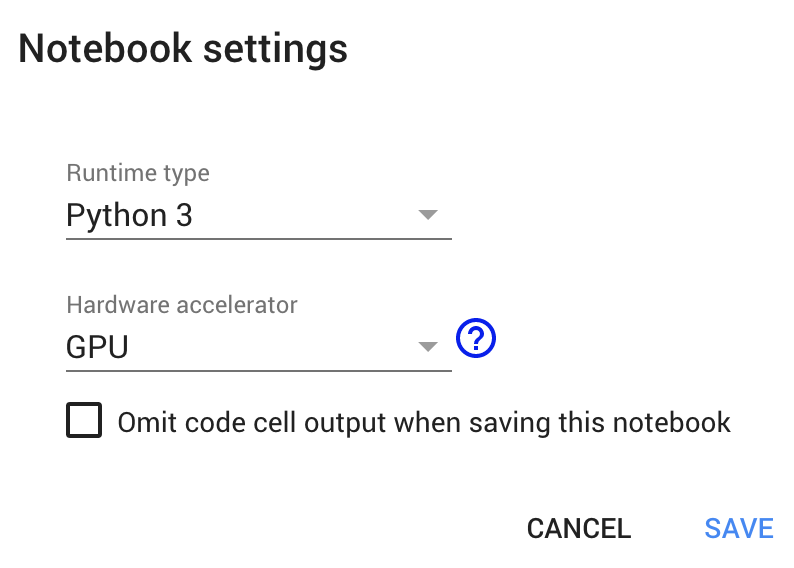

# **FOLLOW THESE 12 STEPS TO TRAIN AN OBJECT DETECTOR USING YOLOv4-tiny**



# **1) Clone `darknet` git repository onto the Colab VM** 

In [27]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


# **2) Create *`yolov4-tiny`* and *`training`* folders in your drive**

 Create a folder named ***yolov4-tiny*** in your drive. 
 
 Next, create another folder named ***training*** inside the ***yolov4-tiny*** folder. This is where we will save our trained weights (This path is mentioned in the obj.data file which we will upload later) 

# **3) Create & upload these files**

`What we need for training custom yolo detector`

a.   `Labeled Custom Dataset` 

b.   `Custom cfg file`

c.   `obj.data and obj.names files` 

d.   `process.py file (to create train.txt and test.txt files for training)`

**I have uploaded my custom files on [GitHub](https://github.com/techzizou/yolov4-tiny-custom_Training).
I am working with 2 classes i.e. with_mask & without_mask**

## **3(a) Upload the Labeled custom dataset *`obj.zip`* file to the *`yolov4-tiny`* folder on your drive**


Create the zip file **obj.zip** from the **obj** folder containing both the input image ".jpg" files and their corresponding YOLO format labeled ".txt" files. 

Upload the zip file to the ***yolov4-tiny*** folder on your drive.

To know more about collecting datasets and labeling, read my [Medium article](https://medium.com/@techzizou007/image-dataset-labeling-annotation-bec3390eda2d) on this.

## **3(b) Create your custom *`config`* file and upload it to your drive**

Download the **yolov4-tiny-custom.cfg** file from ***darknet/cfg*** directory, make changes to it, and upload it to the ***yolov4-tiny*** folder on your drive .

You can also download the custom config files from the official [AlexeyAB Github](https://www.github.com/AlexeyAB/darknet)

**You need to make the following changes in your custom config file:**



*   change line batch to batch=64
*   change line subdivisions to subdivisions=16
*   change line max_batches to (classes*2000 but not less than number of training images, but not less than number of training images and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
*    change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
*    set network size width=416 height=416 or any value multiple of 32
*    change line classes=80 to your number of objects in each of 2 [yolo]-layers
*    change [filters=255] to filters=(classes + 5)x3 in the 2 [convolutional] before each [yolo] layer, keep in mind that it only has to be the last [convolutional] before each of the [yolo] layers.
     So if classes=1 then it should be filters=18. If classes=2 then write filters=21.




## **3(c) Create your *`obj.data`* and *`obj.names`* files and upload them to your drive**

### **obj.data**



```
classes = 2
train  = data/train.txt
valid  = data/test.txt
names = data/obj.names
backup = /mydrive/yolov4-tiny/training

```



### **obj.names**


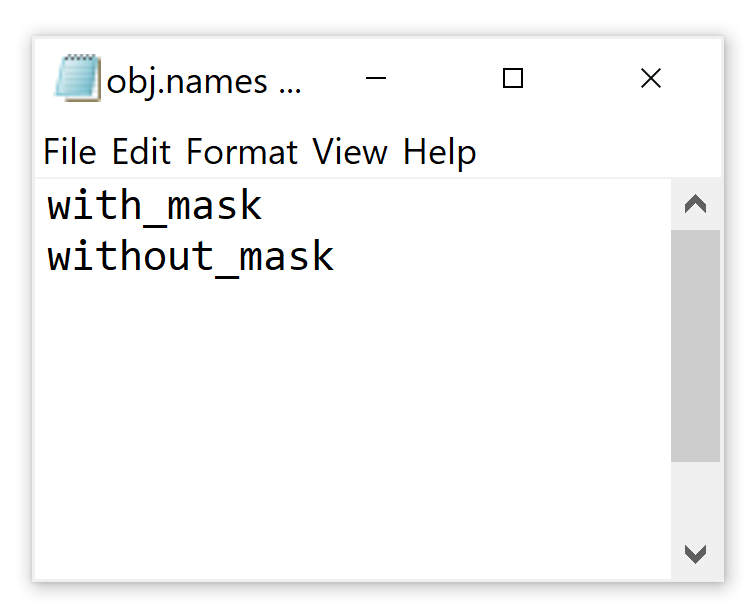

## **3(d) Upload the *`process.py`* script file to the *`yolov4-tiny`* folder on your drive**

**To divide all image files into 2 parts. 90% for train and 10% for test.**

This *process.py* script creates the files *train.txt* & *test.txt* where the *train.txt* file has paths to 90% of the images and *test.txt* has paths to 10% of the images.

# **4) Mount drive and link your folder**

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list contents in yolov4-tiny folder in your drive
!ls /mydrive/yolov4-tiny

# **5) Make changes in the `makefile` to enable OPENCV and GPU**

In [29]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


# **6) Run `make` command to build darknet**

In [ ]:
# build darknet 
!make

# **7) Copy files from your drive to the darknet directory**

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

In [ ]:
#copy the datasets zip file to the root darknet folder
!cp /mydrive/yolov4-tiny/obj.zip ../

# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/

In [33]:
#copy the custom cfg file from the drive to the darknet/cfg folder
!cp /mydrive/yolov4-tiny/yolov4-tiny-custom.cfg ./cfg

In [34]:
# copy the obj.names and obj.data files so that they are now in /darknet/data/ folder
!cp /mydrive/yolov4-tiny/obj.names ./data
!cp /mydrive/yolov4-tiny/obj.data  ./data

In [35]:
#copy the process.py file from the drive to the darknet directory
!cp /mydrive/yolov4-tiny/process.py ./

# **8) Run the *`process.py`* python script to create the *`train.txt`* & *`test.txt`* files inside the *data* folder**

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

# **9) Download the pre-trained *`yolov4-tiny`* weights**

In [ ]:
# Download the yolov4-tiny pre-trained weights file
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

# **10) Training**

## **Train your custom detector** 

For best results, you should stop the training when the average loss is less than 0.05 if possible or at least constantly below 0.3, else train the model until the average loss does not show any significant change for a while.

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show -map

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

## **To restart your training (In case the training does not finish and you get disconnected)**

If you get disconnected or lose your session, you don't have to start training your model from scratch again. You can restart training from where you left off. Use the weights that were saved last. The weights are saved every 100 iterations as ***yolov4-tiny-custom_last.weights*** in the ***yolov4-tiny/training*** folder on your drive. (The path we gave as backup in "obj.data" file). 

**Run the command below to restart training.**


In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_last.weights -dont_show -map

**Check mAP (mean average precision)**

In [ ]:
#You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -points 0

# 🖖